In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Load the dataset (replace 'water_quality_data.csv' with the actual path to your file)
data = pd.read_csv(r'water_potability.csv')

# Inspect the dataset
print(data.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [10]:
print(data.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [11]:
# Data Preprocessing
# Features: 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
# 'Organic_carbon', 'Trihalomethanes', 'Turbidity'
# Target: 'Potability' (1 for safe, 0 for unsafe)

# Features and target variable
X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

# Handling missing data (if any)
X = X.fillna(X.mean())

In [12]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Feature scaling (SVM performs better with scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

SVC()

In [14]:
# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print(f"F1 Score: {f1:.2f}")


Accuracy: 69.51%
Confusion Matrix:
 [[378  34]
 [166  78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79       412
           1       0.70      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.70      0.62      0.61       656
weighted avg       0.70      0.70      0.66       656

F1 Score: 0.44


In [15]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

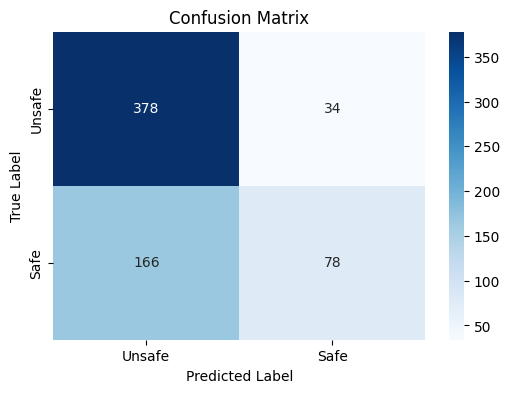

In [16]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsafe', 'Safe'], yticklabels=['Unsafe', 'Safe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()